In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, root_mean_squared_log_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV

In [37]:
df_tips = sns.load_dataset('tips')
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
columns_to_be_encoded = ['smoker', 'day', 'time', 'sex']
for col in columns_to_be_encoded:
    temp_encoder = OneHotEncoder(sparse_output=False).fit(pd.DataFrame(df_tips[col]))
    temp_hasil_encoding = temp_encoder.transform(pd.DataFrame(df_tips[col]))
    print(temp_hasil_encoding)
    dataframe_encode = pd.DataFrame(data=temp_hasil_encoding, columns=[str(x) for x in (list(temp_encoder.categories_))[0]])
    df_tips.drop(col, axis=1, inplace=True)
    df_tips = pd.concat([df_tips, dataframe_encode], axis=1)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 

In [39]:
df_tips

,total_bill,tip,size,No,Yes,Fri,Sat,Sun,Thur,Dinner,Lunch,Female,Male
0,16.99,1.01,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,21.01,3.50,3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,23.68,3.31,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,24.59,3.61,4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
240,27.18,2.00,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
241,22.67,2.00,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
242,17.82,1.75,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [51]:
y=df_tips['tip']
X=df_tips.drop('tip', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2020, test_size=0.2)

In [52]:
linear_regression_scores = []
DT_regression_scores = []

for train, test in KFold(shuffle=True).split(X_train, y_train):
    temp_x_train = X[X.index.isin(train)]
    temp_x_validate = X[X.index.isin(test)]
    temp_y_train = y[y.index.isin(train)]
    temp_y_validate = y.loc[y.index.isin(test)]

    # Assessment buat linear regression model
    LR_model = LinearRegression().fit(X=temp_x_train, y=temp_y_train)
    temp_y_pred = LR_model.predict(X=temp_x_validate)
    linear_regression_scores.append(r2_score(y_true=temp_y_validate, y_pred=temp_y_pred))

    # Assessment buat DTR model
    DTR_model = DecisionTreeRegressor().fit(X=temp_x_train, y=temp_y_train)
    temp_y_pred = DTR_model.predict(X=temp_x_validate)
    DT_regression_scores.append(r2_score(y_true=temp_y_validate, y_pred=temp_y_pred))

Analisa R2 Score, memilih model linear regression vs decision tree

In [61]:
print(f'Statistic untuk linear regression model, Mean R2 Score: {np.average(linear_regression_scores)}, STD R2 Score: {np.std(linear_regression_scores)}')
print(f'Statistic untuk Decission Tree regression model, Mean R2 Score: {np.average(DT_regression_scores)}, STD R2 Score: {np.std(DT_regression_scores)}')

Statistic untuk linear regression model, Mean R2 Score: 0.3892238050076375, STD R2 Score: 0.058386715563819434
Statistic untuk Decission Tree regression model, Mean R2 Score: 0.0470665515506292, STD R2 Score: 0.3244158208958554


Visualize the prediction vs actual

Linear Regression Model

In [54]:
y_pred = LR_model.predict(X_test)
print(f'R2 Score untuk dataset, linear model: {r2_score(y_true=y_test, y_pred=y_pred)}')

R2 Score untuk dataset, linear model: 0.4839380512508279


<Axes: xlabel='None', ylabel='tip'>

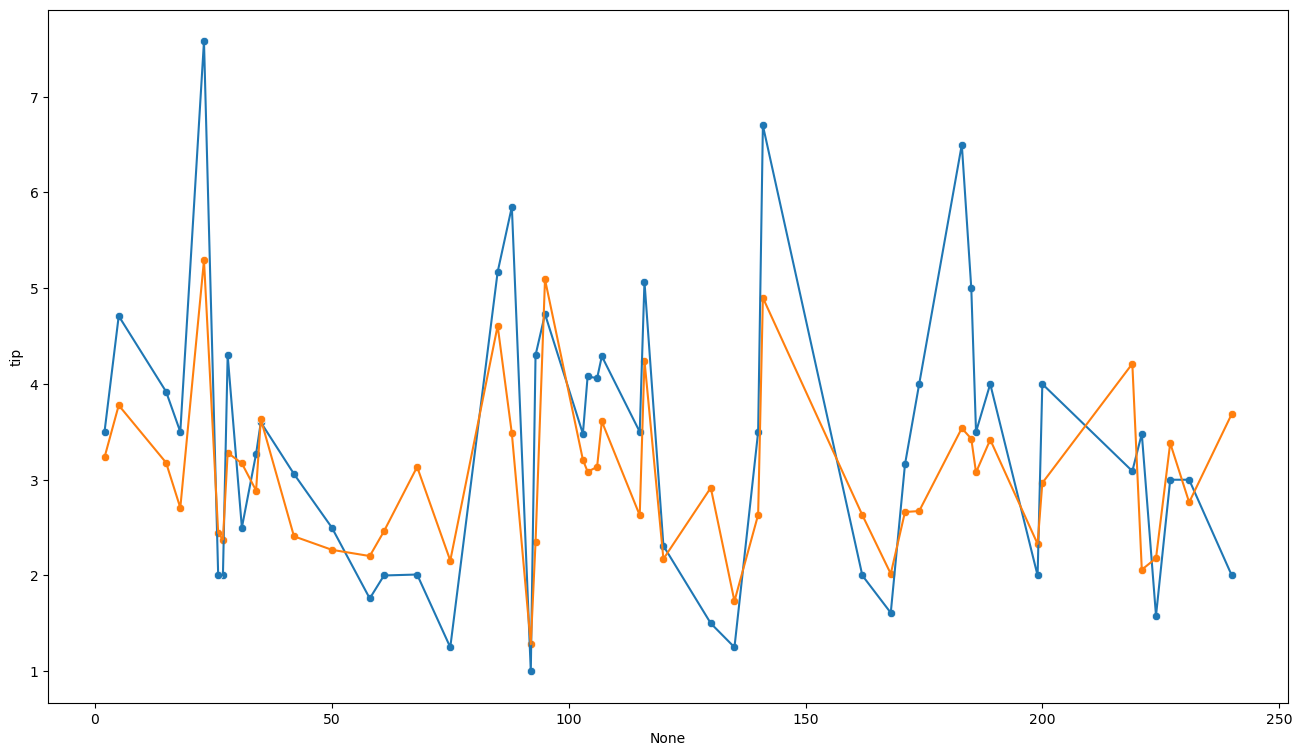

In [56]:
plt.figure(figsize=(16,9))
sns.scatterplot(
    x = X_test.index,
    y = y_test
)
sns.scatterplot(
    x = X_test.index,
    y = y_pred
)
sns.lineplot(
    x = X_test.index,
    y = y_test
)
sns.lineplot(
    x = X_test.index,
    y = y_pred
)

Decission Tree Model

In [60]:
y_pred = DTR_model.predict(X_test)
print(f'R2 Score untuk dataset, DTR model: {r2_score(y_true=y_test, y_pred=y_pred)}')

R2 Score untuk dataset, DTR model: 0.7628003212484173


<Axes: xlabel='None', ylabel='tip'>

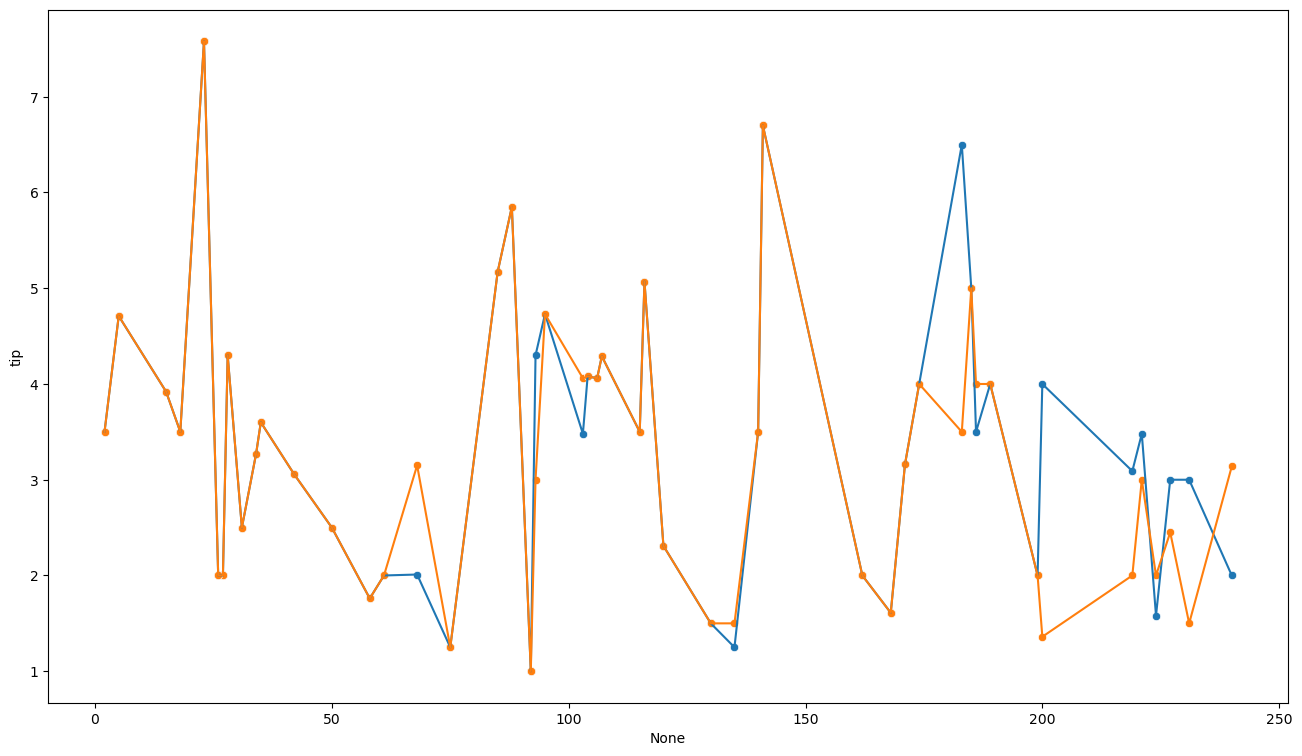

In [59]:
plt.figure(figsize=(16,9))
sns.scatterplot(
    x = X_test.index,
    y = y_test
)
sns.scatterplot(
    x = X_test.index,
    y = y_pred
)
sns.lineplot(
    x = X_test.index,
    y = y_test
)
sns.lineplot(
    x = X_test.index,
    y = y_pred
)

Hyperparameter Tuning: Grid Search

In [65]:
DTR_Grid_Optimized = GridSearchCV(
    estimator=DTR_model,
    param_grid={
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'max_depth': [2,5,10],
        'min_samples_split': [1,2,3,4,5,6,7,8,9,10]
    }
)
DTR_Grid_Optimized.fit(X=X_train, y=y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pac

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 5, 10],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [66]:
DTR_Grid_Optimized.best_params_

{'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_split': 2}

In [67]:
DTR_model.score(X=X_train, y=y_train)

0.6010812492792512

In [68]:
DTR_Grid_Optimized.score(X=X_train, y=y_train)

0.7281590358533157